In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

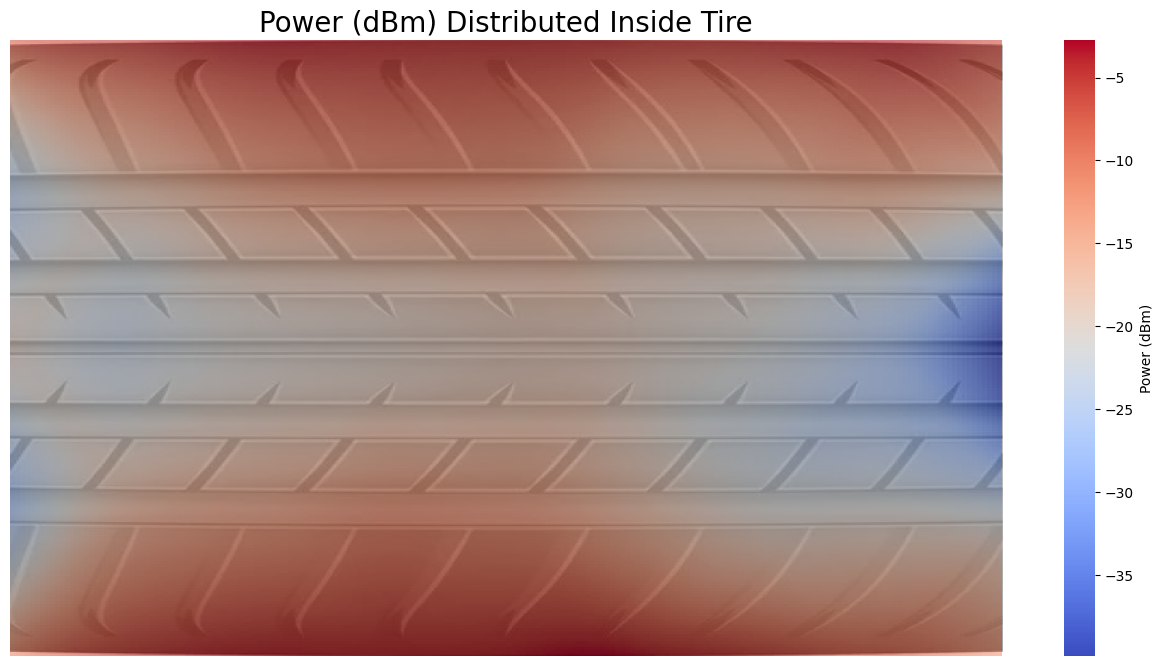

In [5]:
# Load the CSV file
file_path = 'Tire Bench Path Loss M3 - SN Antenna.csv'
df = pd.read_csv(file_path)

# Create a grid for interpolation
num_pos = 200
num_angle = 200
position_values = np.linspace(df['Horizontal Position (cm)'].min(), df['Horizontal Position (cm)'].max(), num_pos)
angle_values = np.linspace(df['Angle (deg)'].min(), df['Angle (deg)'].max(), num_angle)
position_grid, angle_grid = np.meshgrid(angle_values, position_values)

# Interpolate the data
points = df[['Horizontal Position (cm)', 'Angle (deg)']].values
values = df['Power (dBm)'].values
power_grid = griddata(points, values, (angle_grid, position_grid), method='cubic')

# Plot the heatmap
plt.figure(figsize=(16, 8))
sns.heatmap(power_grid, xticklabels=np.round(angle_values, 1), yticklabels=np.round(position_values, 1), cmap="coolwarm", cbar_kws={'label': 'Power (dBm)'})
plt.title('Power (dBm) Distributed Inside Tire', fontsize=20)
# plt.ylabel('Horizontal Position (cm)')
# plt.xlabel('Angle (deg)')
plt.axis("off")

# Load the tire image
tire_image_path = 'tire_rotated.png'  # Update this path to the actual image path
tire_image = plt.imread(tire_image_path)

# Add the tire image overlay
extent=[0, num_pos, 0, num_angle]
plt.imshow(tire_image, aspect='auto', extent=extent, alpha=0.4, zorder=1)
